Loading dataset...
Data loaded successfully.

Dataset Summary:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

Missing Values:
 

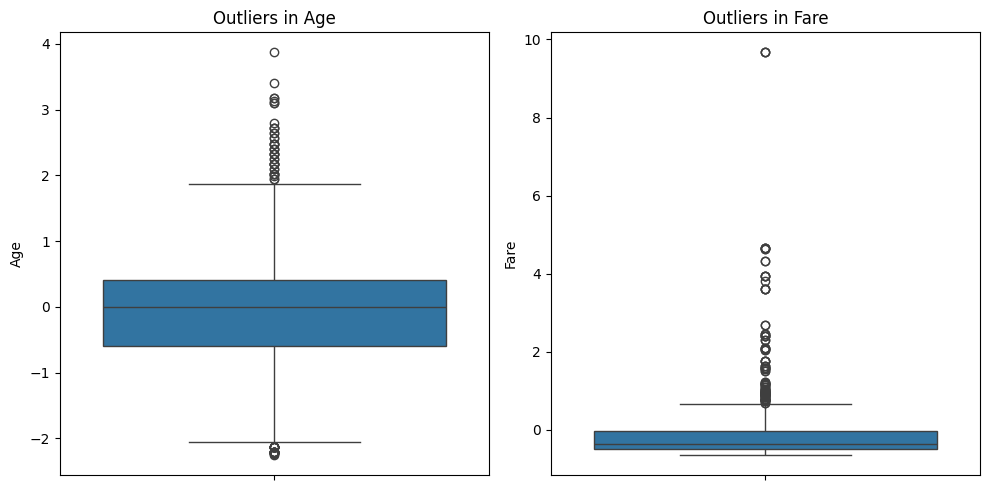

Saving cleaned dataset...
 All steps completed. File saved as 'processed_titanic_alt.csv'


In [2]:
# Titanic Dataset Preprocessing - Alternate Style

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

# --------------------- Load & Inspect Data ---------------------

def load_data():
    print("Loading dataset...")
    url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
    data = pd.read_csv(url)
    print("Data loaded successfully.\n")
    return data

def inspect_data(df):
    print("Dataset Summary:")
    print(df.describe())
    print("\nMissing Values:\n", df.isnull().sum())
    print("\nData Types:\n", df.dtypes)

# --------------------- Data Cleaning ---------------------

def clean_data(df):
    print("Handling missing values...")
    df['Age'] = df['Age'].fillna(df['Age'].mean())
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
    df.drop(columns=['Cabin'], inplace=True)
    print("Missing values handled.\n")
    return df

# --------------------- Feature Encoding ---------------------

def encode_features(df):
    print("Encoding categorical features...")
    label_encoder = LabelEncoder()
    df['Sex'] = label_encoder.fit_transform(df['Sex'])
    df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
    print("Encoding complete.\n")
    return df

# --------------------- Feature Scaling ---------------------

def scale_features(df):
    print("Standardizing numerical features...")
    scaler = StandardScaler()
    for feature in ['Age', 'Fare']:
        df[feature] = scaler.fit_transform(df[[feature]])
    print("Scaling done.\n")
    return df

# --------------------- Outlier Detection ---------------------

def plot_outliers(df):
    print("Plotting boxplots for outlier visualization...")
    plt.figure(figsize=(10, 5))
    for i, col in enumerate(['Age', 'Fare']):
        plt.subplot(1, 2, i + 1)
        sns.boxplot(y=df[col])
        plt.title(f'Outliers in {col}')
    plt.tight_layout()
    plt.show()

# --------------------- Main Process ---------------------

def main():
    df = load_data()
    inspect_data(df)
    df = clean_data(df)
    df = encode_features(df)
    df = scale_features(df)
    plot_outliers(df)

    print("Saving cleaned dataset...")
    df.to_csv("processed_titanic_alt.csv", index=False)
    print(" All steps completed. File saved as 'processed_titanic_alt.csv'")

# Run the pipeline
main()
